# AIPI 590 - XAI | Assignment #1
### Interpretable ML Assignment
### Lindsay Gross


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lindsaygross/Interpretable-ML/blob/lindsay_assign1/Interpretable_ML.ipynb)


👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts 
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there. 
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [5]:
# set up to use both in vscode and colab
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

repo_name = "Duke-AI-XAI"
git_path = "https://github.com/AIPI-590-XAI/Duke-AI-XAI.git"

if IN_COLAB:
    print("Running in Google Colab...")
    # Clone repo if not already present
    if not os.path.exists(repo_name):
        !git clone {git_path}
    %cd {repo_name}
    # Install dependencies
    !pip install -r requirements.txt
else:
    print("Running locally in VS Code...")
    # Just install requirements from local file
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        print("⚠️ requirements.txt not found — are you in the repo root?")


rm: ./sample_data: No such file or directory
Running locally in VS Code...
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.0 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-mac

In [7]:
import numpy as np
import pandas as pd


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Exploratory Data Analysis
Check assumptions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


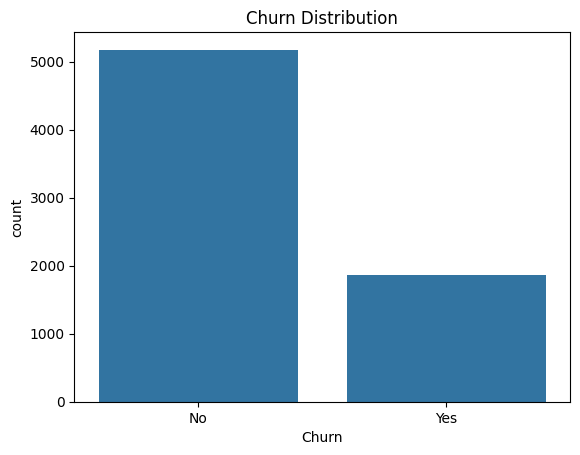

In [ ]:
"""
Perform an exploratory analysis of the dataset to understand the relationships between different 
features and the target variable (churn). Use appropriate visualizations and statistical methods 
to determine whether assumptions about linear, logistic, and GAM models are met. 
"""

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


# describe the data
print(df.info())
print(df.shape)
print(df.describe())

# visualize the churn distribution
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


# Assumptions Explained

In [ ]:
# Check for assumptions of linearity

In [ ]:
# Check for assumptions of Independence of Observations

In [ ]:
# Check for assumptions of Homoscedasticity

In [ ]:
# Check for assumptions of Normality of Residuals

In [ ]:
# Check for assumptions of No Multicollinearity

In [ ]:
# Check for assumptions of No Influential Outliers

In [ ]:
# Coefficent Comparison Plot

In [ ]:
# Residual Plot

In [ ]:
# Actual vs Predicted Plot

In [ ]:
# Feature Importance Plot

In [ ]:
# Lasso Regualrization Plot

In [ ]:
# Linear Regression Model

In [ ]:
# Logistic Regression Model

In [ ]:
# GAM Model

# Discussion of Strengths and Weaknesses

# Recommendation of telecommunications model 
Recommendations for which model(s) the telecommunications company should use to address their customer churn problem are provided and explained in markdown